# DATA
https://en.wikipedia.org/wiki/List_of_world_records_in_Olympic_weightlifting#Current_records

In [1]:
# 9 weight classes each (not counting 109+ or 87+)
weight_classes_men = [55,61,67,73,81,89,96,102,109]
weight_classes_women = [45,49,55,59,64,71,76,81,87]
snatch_men = [135,145,155,169,175,179,187,191,200]
caj_men = [166,174,188,198,208,217,231,231,241]
total_men = [294,318,339,364,378,392,416,412,435]
snatch_women = [85,96,102,110,117,117,124,127,132]
caj_women = [108,119,129,140,145,152,156,158,164]
total_women = [191,213,227,247,261,267,278,283,294]

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
def get_line_fit(x,y):
    # determine best fit line
    fit_params = np.polyfit(x, y, 1, full=False)
    beta, c = fit_params
    return beta,c

In [15]:
def plot_fitted_line(x_data:list, y_data:list, plot_data:dict = None, save = False, plot_log = False):
    beta, log10c = get_line_fit(np.log10(x_data), np.log10(y_data))
    fig = plt.figure()
    ax = plt.gca()
    if plot_log:
        x_fit = np.logspace(min(x_data), max(y_data), 1000)
        y_fit = beta*x_fit + log10c
    else:
        x_fit = np.linspace(min(x_data), max(y_data), 1000)
        y_fit = 10**(log10c)*x_fit**(beta) 
    ax.plot(x_fit, y_fit, label = f'y = {10**(log10c):.3f} x^{beta: .3f}')
    ax.plot(x_data ,y_data, 'o', c='red', alpha=1.0, markeredgecolor='none', label = "data")
    if plot_data is None:
        ax.set_xlabel("weight_classes")
        ax.set_ylabel("competiton")
        ax.set_title("competition vs weight classes")
    else:
        ax.set_xlabel(plot_data["xlabel"])
        ax.set_ylabel(plot_data["ylabel"])
        ax.set_title(plot_data["title"])
    plt.legend()
    if save:
        plt.savefig(plot_data["title"]+".png")
    plt.show()

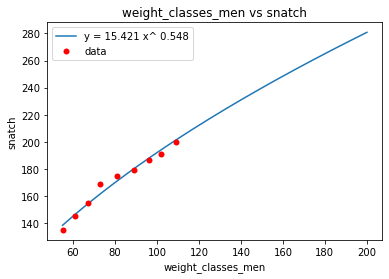

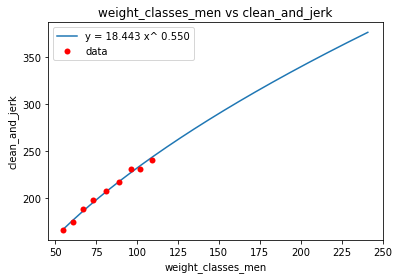

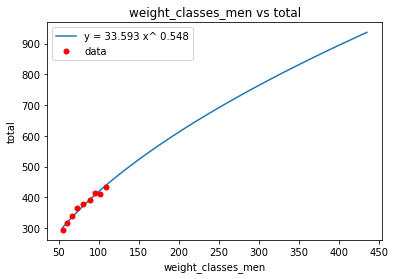

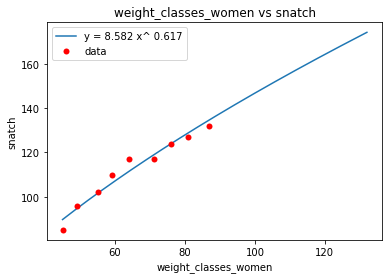

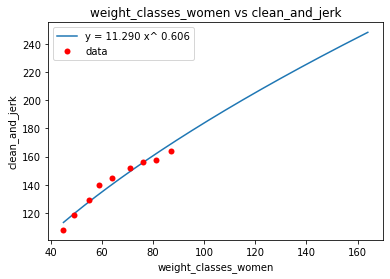

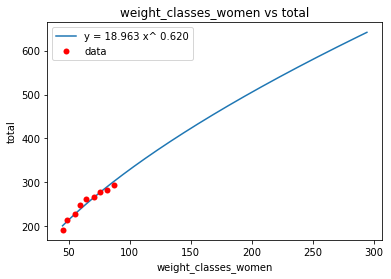

In [26]:
xlabels = ["weight_classes_men", "weight_classes_women"]
x_data = {
    "weight_classes_men" : weight_classes_men,
    "weight_classes_women" : weight_classes_women
}
y_data = {
    "men" : {
        "snatch" : snatch_men,
        "clean_and_jerk": caj_men,
        "total" : total_men
    },
    "women" : {
        "snatch" : snatch_women,
        "clean_and_jerk": caj_women,
        "total" : total_women
    }
}

ylabels = ["snatch", "clean_and_jerk", "total"]
for xlabel in xlabels:
    for ylabel in ylabels:
        plot_data = {}
        plot_data["xlabel"] = xlabel
        plot_data["ylabel"] = ylabel
        plot_data["title"] = "{} vs {}".format(xlabel, ylabel)
        y_key = xlabel.replace("weight_classes_", '')
        plot_fitted_line(x_data[xlabel], y_data[y_key][ylabel], plot_data, save=True, plot_log = False)
        



In [ ]:
# Renormalize
np.max(100*(y_data/c*x_data**beta) - 1)


In [29]:
# y = c x^ beta
# renormalize using 100x(M_world_record/c M_weight_class^beta) - 1 
xlabels = ["weight_classes_men", "weight_classes_women"]
x_data = {
    "weight_classes_men" : weight_classes_men,
    "weight_classes_women" : weight_classes_women
}
y_data = {
    "men" : {
        "snatch" : snatch_men,
        "clean_and_jerk": caj_men,
        "total" : total_men
    },
    "women" : {
        "snatch" : snatch_women,
        "clean_and_jerk": caj_women,
        "total" : total_women
    }
}
ylabels = ["snatch", "clean_and_jerk", "total"]
for xlabel in xlabels:
    for ylabel in ylabels:
        x = x_data[xlabel]
        y_key = xlabel.replace("weight_classes_", '')
        y = y_data[y_key][ylabel]
        beta, log10c = get_line_fit(np.log10(x), np.log10(y))
        print(xlabel, ylabel)
        print(100*(y/(log10c*x**beta)) - 1)
        ind = np.argmax(100*(y/(log10c*x**beta)) - 1)
        record = y[ind]
        print("best record weight post Normalization: ", record)
        
        

weight_classes_men snatch
[1264.44222654 1283.24252481 1303.04871024 1355.58567789 1325.97349731
 1288.05858721 1290.96708684 1275.5042444  1287.93218758]
best record weight post Normalization:  169
weight_classes_men clean_and_jerk
[1447.20113236 1432.98869778 1470.47028903 1477.3549341  1465.71360681
 1451.95078556 1482.62466318 1433.9857452  1442.45434489]
best record weight post Normalization:  231
weight_classes_men total
[2143.11466721 2190.25103386 2217.92287741 2272.19767531 2228.89860774
 2195.186465   2234.95054065 2141.10881042 2179.92535268]
best record weight post Normalization:  364
weight_classes_women snatch
[869.88000987 932.2719507  922.43570009 952.67592431 963.74458846
 903.93844258 918.67084213 904.63560216 899.71910444]
best record weight post Normalization:  117
weight_classes_women clean_and_jerk
[1020.72995998 1068.17425928 1079.66704445 1122.96993427 1107.12068845
 1089.80373948 1073.2815349  1045.84555652 1039.55163877]
best record weight post Normalization: 